In [115]:
import pandas as pd
import numpy as np
import glob
import sys
import os

#데이터 파일 한번에 여러개 불러오기

Cus_Info=pd.DataFrame()

for f in glob.glob("C:\\Users\\didrn\\OneDrive\\바탕 화면\\아이펠리.xlsx\\2*.xlsx"):
    data = pd.read_excel(f)

    columns = ['결제일자','품목코드','수취인','주소']
    df = pd.DataFrame(data, columns=columns)
    Cus_Info = Cus_Info.append(df, ignore_index=True)
    
Cus_Info.dropna(inplace = True) #결측치 제거
Cus_Info = Cus_Info[~Cus_Info['주소'].str.contains("주소", na=False, case=False)]
#잘못된 데이터가 포함된 행 제거
Cus_Info = Cus_Info.drop_duplicates() #중복되는 행 제거


In [116]:
Cus_Info.to_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\Cus_data.xlsx", header=True, index=False)
#바탕화면에 병합된 하나의 파일로 저장

In [135]:
def repurchase_rate(target_code):
    
    case = Cus_Info[Cus_Info.품목코드 == str(target_code)]

    group = case.groupby('주소')['결제일자'].nunique()
    #같은 주소 기준 결제일자로 그룹화

    buy_total = len([i for i in case.품목코드]) # 중복을 제거한 구매횟수
    buy_2 = 0
    buy_over = 0

    for i in group:
        if i == 1:
            pass
        elif i == 2:
            buy_2 += 1
        else:
            buy_over += 1

    rebuy_2 = buy_2 / buy_total * 100
    rebuy_over = buy_over / buy_total * 100
    
    print("1회 재구매율: %f" %(rebuy_2))
    print("2회 이상 재구매율: %f" %(rebuy_over))

In [136]:
repurchase_rate("A0001")

1회 재구매율: 3.546384
2회 이상 재구매율: 0.343919


In [137]:
repurchase_rate("A0002")

1회 재구매율: 3.052354
2회 이상 재구매율: 0.315539


In [139]:
repurchase_rate("IFT02LB")

1회 재구매율: 3.440233
2회 이상 재구매율: 0.291545


In [140]:
repurchase_rate("IFT02NB")

1회 재구매율: 2.357456
2회 이상 재구매율: 0.493421


In [141]:
repurchase_rate("IFT02LW")

1회 재구매율: 4.032520
2회 이상 재구매율: 0.390244


In [142]:
repurchase_rate("IFT02NW")

1회 재구매율: 4.872727
2회 이상 재구매율: 0.727273


In [240]:
import datetime as dt
import matplotlib.pyplot as plt

In [294]:
#재구매 주기 리스트 구하기
def term_list(target_code): #target_code에 조사하고 싶은 품목코드 입력
    
    case = Cus_Info[Cus_Info.품목코드 == target_code]

    group = case.groupby('주소')['결제일자']
    
    a = {}

    for i,j in group:
        a[i] = j
        
    term_list = []

    for i in a.values():
        if i.count() == 2:

            dt1 = dt.datetime(int(str(i).split()[1].split("-")[0]),
                      int(str(i).split()[1].split("-")[1]),
                      int(str(i).split()[1].split("-")[2]))
            dt2 = dt.datetime(int(str(i).split()[4].split("-")[0]),
                      int(str(i).split()[4].split("-")[1]),
                      int(str(i).split()[4].split("-")[2]))

            term = dt2 - dt1
            term_list.append(abs(term.days))

    return term_list

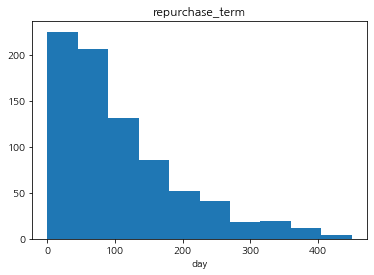

In [301]:
plt.hist(term_list("A0001"))
plt.title("repurchase_term")
plt.xlabel("day")
plt.show()

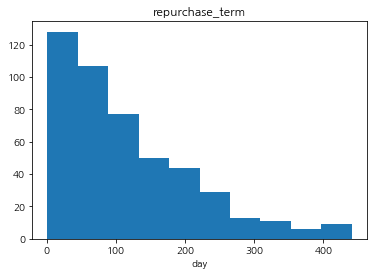

In [302]:
plt.hist(term_list("A0002"))
plt.title("repurchase_term")
plt.xlabel("day")
plt.show()

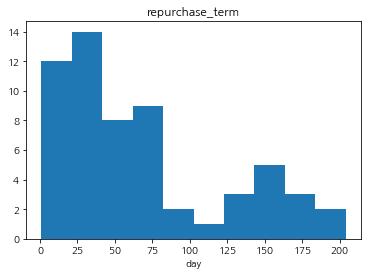

In [303]:
plt.hist(term_list("IFT02LB"))
plt.title("repurchase_term")
plt.xlabel("day")
plt.show()

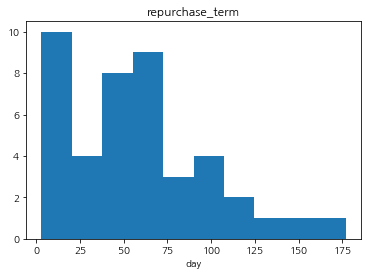

In [304]:
plt.hist(term_list("IFT02NB"))
plt.title("repurchase_term")
plt.xlabel("day")
plt.show()

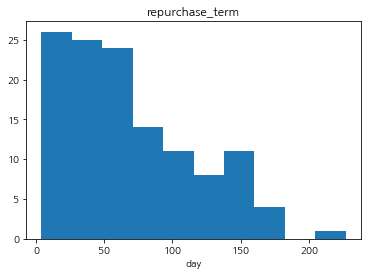

In [305]:
plt.hist(term_list("IFT02LW"))
plt.title("repurchase_term")
plt.xlabel("day")
plt.show()

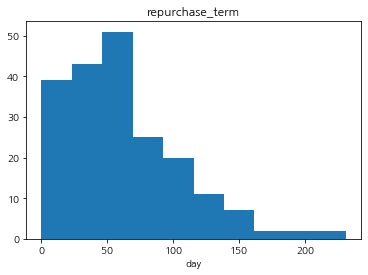

In [306]:
plt.hist(term_list("IFT02NW"))
plt.title("repurchase_term")
plt.xlabel("day")
plt.show()